# Models

Build models to see how much each feature contributes to productivity

- Models
    - LinearRegression
    - ExplainableBoostingRegressor
- Features
    - Education
    - Population
    - R&D Expenditure
    
## Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

In [2]:
# See: ../src/data/make_dataset.py
df = pd.read_csv('../data/interim/dataset.csv')
df.head()

,year,GEO,UNIT,NA_ITEM,compensation,Flag and Footnotes,education,population,rd_expenditure,fertility_rate
0,2010,Belgium,Euro,Compensation of employees per hour worked,34.3,NaN,48.457143,10839905,2.06,1.86219
1,2011,Belgium,Euro,Compensation of employees per hour worked,35.1,NaN,47.857143,11000638,2.17,1.81431
2,2012,Belgium,Euro,Compensation of employees per hour worked,36.2,NaN,48.242857,11075889,2.28,1.79743
3,2013,Belgium,Euro,Compensation of employees per hour worked,37.2,NaN,49.242857,11137974,2.33,1.75557
4,2014,Belgium,Euro,Compensation of employees per hour worked,37.6,NaN,50.285714,11180840,2.37,1.74223


## Add Trends

There are several ways to capture trends.

- Move data to n years (`shift`)
- Take the mean of n years
- ...

In [3]:
features = ['education', 'population', 'rd_expenditure', 'fertility_rate']
shift_range = [1, 2]

def add_trends(df):
    for feature in features:
        for shift in shift_range:
            df[f'{feature}_shift_{shift}'] = df.sort_values('year').groupby(['GEO'])[feature].shift(shift)
            df[f'{feature}_diff_{shift}'] = df[feature] - df[f'{feature}_shift_{shift}']

add_trends(df)
df.head()

,year,GEO,UNIT,NA_ITEM,compensation,Flag and Footnotes,education,population,rd_expenditure,fertility_rate,...,population_shift_2,population_diff_2,rd_expenditure_shift_1,rd_expenditure_diff_1,rd_expenditure_shift_2,rd_expenditure_diff_2,fertility_rate_shift_1,fertility_rate_diff_1,fertility_rate_shift_2,fertility_rate_diff_2
0,2010,Belgium,Euro,Compensation of employees per hour worked,34.3,NaN,48.457143,10839905,2.06,1.86219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,Belgium,Euro,Compensation of employees per hour worked,35.1,NaN,47.857143,11000638,2.17,1.81431,...,NaN,NaN,2.06,0.11,NaN,NaN,1.86219,-0.04788,NaN,NaN
2,2012,Belgium,Euro,Compensation of employees per hour worked,36.2,NaN,48.242857,11075889,2.28,1.79743,...,10839905.0,235984.0,2.17,0.11,2.06,0.22,1.81431,-0.01688,1.86219,-0.06476
3,2013,Belgium,Euro,Compensation of employees per hour worked,37.2,NaN,49.242857,11137974,2.33,1.75557,...,11000638.0,137336.0,2.28,0.05,2.17,0.16,1.79743,-0.04186,1.81431,-0.05874
4,2014,Belgium,Euro,Compensation of employees per hour worked,37.6,NaN,50.285714,11180840,2.37,1.74223,...,11075889.0,104951.0,2.33,0.04,2.28,0.09,1.75557,-0.01334,1.79743,-0.05520


## Add Aggregation Features

In [4]:
agg_params = {}
for feature in features:
    for shift in shift_range:
        agg_params[f'{feature}_shift_{shift}_mean'] = (f'{feature}_shift_{shift}', 'mean')

agg = df.groupby('year').agg(**agg_params).reset_index()
df = df.merge(agg, on='year')
df.head()

,year,GEO,UNIT,NA_ITEM,compensation,Flag and Footnotes,education,population,rd_expenditure,fertility_rate,...,fertility_rate_shift_2,fertility_rate_diff_2,education_shift_1_mean,education_shift_2_mean,population_shift_1_mean,population_shift_2_mean,rd_expenditure_shift_1_mean,rd_expenditure_shift_2_mean,fertility_rate_shift_1_mean,fertility_rate_shift_2_mean
0,2010,Belgium,Euro,Compensation of employees per hour worked,34.3,NaN,48.457143,10839905,2.06,1.86219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,Bulgaria,Euro,Compensation of employees per hour worked,3.2,NaN,45.091667,7421766,0.57,1.57444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,Czechia,Euro,Compensation of employees per hour worked,8.5,NaN,55.166667,10462088,1.34,1.51363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,Denmark,Euro,Compensation of employees per hour worked,35.2,NaN,72.966667,5534738,2.92,1.87025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,Germany,Euro,Compensation of employees per hour worked,26.2,NaN,57.473333,81802257,2.73,1.39206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for feature in features:
    for shift in shift_range:
        df[f'{feature}_shift_{shift}_mean_diff'] = df[f'{feature}_shift_{shift}'] - df[f'{feature}_shift_{shift}_mean']
df.head()

,year,GEO,UNIT,NA_ITEM,compensation,Flag and Footnotes,education,population,rd_expenditure,fertility_rate,...,fertility_rate_shift_1_mean,fertility_rate_shift_2_mean,education_shift_1_mean_diff,education_shift_2_mean_diff,population_shift_1_mean_diff,population_shift_2_mean_diff,rd_expenditure_shift_1_mean_diff,rd_expenditure_shift_2_mean_diff,fertility_rate_shift_1_mean_diff,fertility_rate_shift_2_mean_diff
0,2010,Belgium,Euro,Compensation of employees per hour worked,34.3,NaN,48.457143,10839905,2.06,1.86219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,Bulgaria,Euro,Compensation of employees per hour worked,3.2,NaN,45.091667,7421766,0.57,1.57444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,Czechia,Euro,Compensation of employees per hour worked,8.5,NaN,55.166667,10462088,1.34,1.51363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,Denmark,Euro,Compensation of employees per hour worked,35.2,NaN,72.966667,5534738,2.92,1.87025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,Germany,Euro,Compensation of employees per hour worked,26.2,NaN,57.473333,81802257,2.73,1.39206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Scale Features

In [6]:
all_features = [
    'education_shift_1',
#     'education_shift_1_mean_diff',
    'education_diff_1',
    'education_shift_2',
#     'education_shift_2_mean_diff',
    'education_diff_2',
    'population_shift_1',
#     'population_shift_1_mean_diff',
    'population_diff_1',
    'population_shift_2',
#     'population_shift_2_mean_diff',
    'population_diff_2',
    'rd_expenditure_shift_1',
#     'rd_expenditure_shift_1_mean_diff',
    'rd_expenditure_diff_1',
    'rd_expenditure_shift_2',
#     'rd_expenditure_shift_2_mean_diff',
    'rd_expenditure_diff_2',
    'fertility_rate_shift_1',
#     'fertility_rate_shift_1_mean_diff',
    'fertility_rate_diff_1',
    'fertility_rate_shift_2',
#     'fertility_rate_shift_2_mean_diff',
    'fertility_rate_diff_2',
]

def scale(df):
    for column in all_features:
        scaler = MinMaxScaler()
        df[column] = scaler.fit_transform(df[[column]])

scale(df)
df.head()

,year,GEO,UNIT,NA_ITEM,compensation,Flag and Footnotes,education,population,rd_expenditure,fertility_rate,...,fertility_rate_shift_1_mean,fertility_rate_shift_2_mean,education_shift_1_mean_diff,education_shift_2_mean_diff,population_shift_1_mean_diff,population_shift_2_mean_diff,rd_expenditure_shift_1_mean_diff,rd_expenditure_shift_2_mean_diff,fertility_rate_shift_1_mean_diff,fertility_rate_shift_2_mean_diff
0,2010,Belgium,Euro,Compensation of employees per hour worked,34.3,NaN,48.457143,10839905,2.06,1.86219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,Bulgaria,Euro,Compensation of employees per hour worked,3.2,NaN,45.091667,7421766,0.57,1.57444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,Czechia,Euro,Compensation of employees per hour worked,8.5,NaN,55.166667,10462088,1.34,1.51363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,Denmark,Euro,Compensation of employees per hour worked,35.2,NaN,72.966667,5534738,2.92,1.87025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,Germany,Euro,Compensation of employees per hour worked,26.2,NaN,57.473333,81802257,2.73,1.39206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Split Dataset

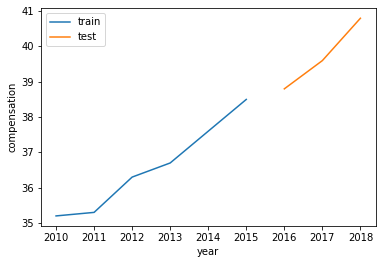

train shape: (192, 42), test shape: (96, 42)


In [7]:
train_size = 0.7

years = df['year'].unique()
years = sorted(years)
pivot = int(len(years) * train_size)
train_index = years[:pivot]
test_index = years[pivot:]

train_df = df[df['year'].isin(train_index)]
test_df = df[df['year'].isin(test_index)]

train_temp = train_df[train_df['GEO'] == 'Denmark']
test_temp = test_df[test_df['GEO'] == 'Denmark']
sns.lineplot(data=train_temp, x='year', y='compensation', label='train')
sns.lineplot(data=test_temp, x='year', y='compensation', label='test')
plt.show()

print(f'train shape: {train_df.shape}, test shape: {test_df.shape}')

In [8]:
# train_df = pd.read_csv('../data/interim/train.csv')
# test_df = pd.read_csv('../data/interim/test.csv')
# train_df.head()

## Visualization for Train Dataset

- Correlation
- jointplot
- pairplot

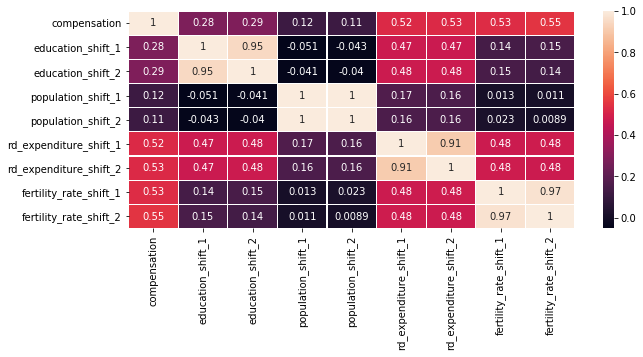

In [9]:
features = [
    [
        'education_shift_1',
        'education_shift_2',
        'population_shift_1',
        'population_shift_2',
        'rd_expenditure_shift_1',
        'rd_expenditure_shift_2',
        'fertility_rate_shift_1',
        'fertility_rate_shift_2',
    ],
]

for fs in features:
    corr = train_df[
        ['compensation'] + fs
    ].corr()
    plt.figure(figsize=(10,4))
    sns.heatmap(corr, annot=True, linewidths=0.2)
    plt.show()

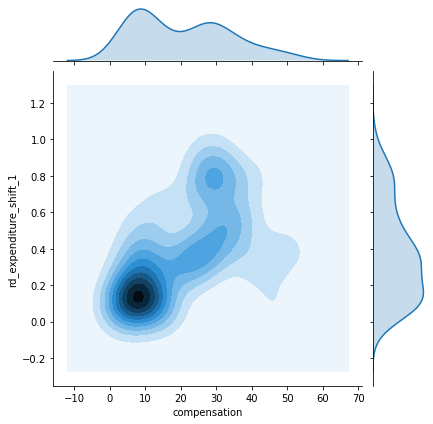

In [10]:
sns.jointplot(data=train_df, x='compensation', y='rd_expenditure_shift_1', kind='kde')

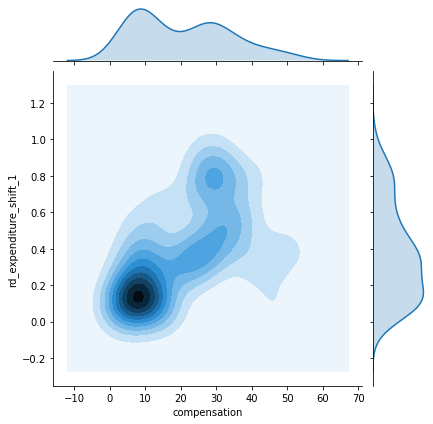

In [11]:
sns.jointplot(data=train_df, x='compensation', y='rd_expenditure_shift_1', kind='kde')

# Train Models

Train models to predict compensation (productivity) using past data.

## LinearRegression

$$
y = \beta_0 + \sum_{i=1}^{n} \beta_i x_i
$$

,features,error,train?
2,"education_shift_2, population_shift_2, rd_expe...",10.186635,train
0,"education_shift_1, population_shift_1, rd_expe...",10.229784,train
4,"population_shift_1, education_shift_1, rd_expe...",10.229784,train
1,"education_shift_1, population_shift_1, rd_expe...",10.967458,test
5,"population_shift_1, education_shift_1, rd_expe...",10.967458,test
3,"education_shift_2, population_shift_2, rd_expe...",10.973313,test


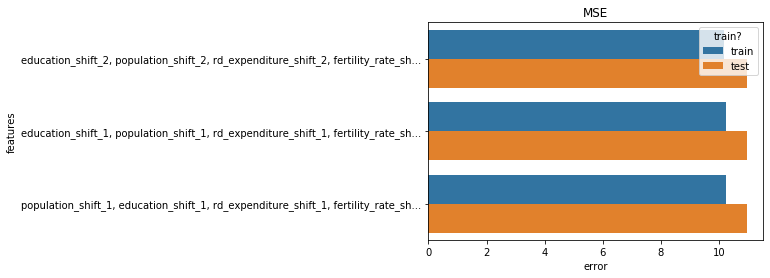

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def fit(features):
    train_temp = train_df[features + ['compensation']].dropna()
    test_temp = test_df[features + ['compensation']].dropna()
    x_train, y_train = train_temp[features], train_temp[['compensation']]
    x_test, y_test = test_temp[features], test_temp[['compensation']]
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    train_error = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
    test_error = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
    return train_error, test_error

features = [
    ['education_shift_1', 'population_shift_1', 'rd_expenditure_shift_1', 'fertility_rate_shift_1'],
    ['education_shift_2', 'population_shift_2', 'rd_expenditure_shift_2', 'fertility_rate_shift_2'],
    ['population_shift_1', 'education_shift_1', 'rd_expenditure_shift_1', 'fertility_rate_shift_1'],
]

rows = []
for fs in features:
    train_error, test_error = fit(fs)
    feature_name = ', '.join(fs)
    if len(feature_name) > 80:
        feature_name = feature_name[:80] + '...'
    rows.append({
        'features': feature_name,
        'error': train_error,
        'train?': 'train'
    })
    rows.append({
        'features': feature_name,
        'error': test_error,
        'train?': 'test'
    })
    
result = pd.DataFrame(rows).sort_values(by='error')
display(result)

sns.barplot(data=result, x='error', y='features', hue='train?').set_title('MSE')
plt.show()

In [13]:
train_temp = train_df[all_features + ['compensation']].dropna()
test_temp = test_df[all_features + ['compensation']].dropna()
x_train, y_train = train_temp[all_features], train_temp[['compensation']]
x_test, y_test = test_temp[all_features], test_temp[['compensation']]

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## LightGBM

This is a kind of gradient boosting tree.

GitHub: https://github.com/microsoft/LightGBM

In [14]:
import shap
shap.initjs()

In [15]:
from lightgbm import LGBMRegressor

train_temp = train_df[all_features + ['compensation']].dropna()
test_temp = test_df[all_features + ['compensation']].dropna()
x_train, y_train = train_temp[all_features], train_temp[['compensation']]
x_test, y_test = test_temp[all_features], test_temp[['compensation']]

gbm = LGBMRegressor()
gbm.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Tune LightGBM using Optuna

Optuna employs a Bayesian optimization algorithm called Tree-structured Parzen Estimator.

Paper: https://arxiv.org/abs/1907.10902
GitHub: https://github.com/optuna/optuna

In [16]:
import lightgbm as lgb
import optuna

def objective(trial):
    param = {
        "objective": "regression",
        "metric": "l2",
        "verbosity": 0,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_loguniform("lambda_l1", 1e-8, 10.0),
        "lambda_l2": trial.suggest_loguniform("lambda_l2", 1e-8, 10.0),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_uniform("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 50),
    }

    dtrain = lgb.Dataset(x_train, label=y_train)
    gbm = lgb.train(param, dtrain)
    error = np.sqrt(mean_squared_error(y_test, gbm.predict(x_test)))
    return error

optuna.logging.set_verbosity(optuna.logging.CRITICAL)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print(" {}: {}".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 6.760804284468237
  Params: 
 lambda_l1: 0.022922524997120615
 lambda_l2: 7.091748949127449e-08
 num_leaves: 196
 feature_fraction: 0.9426853800296471
 bagging_fraction: 0.9721583966226588
 bagging_freq: 1
 min_child_samples: 14


In [17]:
dtrain = lgb.Dataset(x_train, label=y_train)
params = trial.params
params['objective'] = 'regression'
tuned_gbm = lgb.train(params, dtrain)
error = np.sqrt(mean_squared_error(y_test, tuned_gbm.predict(x_test)))
error

6.760804284468237

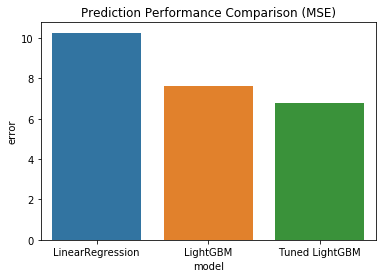

In [18]:
rows = []
rows.append({
    'model': 'LinearRegression',
    'error': np.sqrt(mean_squared_error(y_test, lr.predict(x_test))),
})
rows.append({
    'model': 'LightGBM',
    'error': np.sqrt(mean_squared_error(y_test, gbm.predict(x_test))),
})
rows.append({
    'model': 'Tuned LightGBM',
    'error': np.sqrt(mean_squared_error(y_test, tuned_gbm.predict(x_test))),
})
result = pd.DataFrame(rows).sort_values('error', ascending=False)
sns.barplot(data=result, x='model', y='error').set_title('Prediction Performance Comparison (MSE)')
plt.show()

# Visualize Predictions

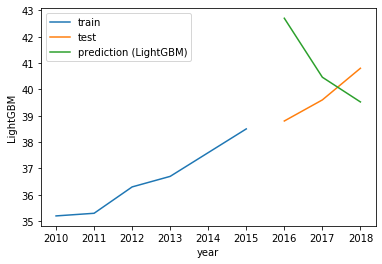

In [19]:
def visualize_prediction(country):
    train_temp = train_df[train_df['GEO'] == country]
    test_temp = test_df[all_features + ['compensation', 'year', 'GEO']].dropna()
    test_temp = test_temp[test_temp['GEO'] == country]
    x_test, y_test = test_temp[all_features], test_temp[['compensation']]

    test_temp['LightGBM'] = tuned_gbm.predict(x_test)

    sns.lineplot(data=train_temp, x='year', y='compensation', label='train')
    sns.lineplot(data=test_temp, x='year', y='compensation', label='test')
    sns.lineplot(data=test_temp, x='year', y='LightGBM', label='prediction (LightGBM)')
    plt.show()

for country in ['Denmark']:
    visualize_prediction(country)

# Visualize Feature Importance

- Coefficients (LinearRegression)
- Feature Importances (Booster)
- Shap (LightBGM)
  - Paper: http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions
  - GitHub: https://github.com/slundberg/shap
- InterpretML (ExplainableBoostingRegressor)
  - GitHub: https://github.com/interpretml/interpret

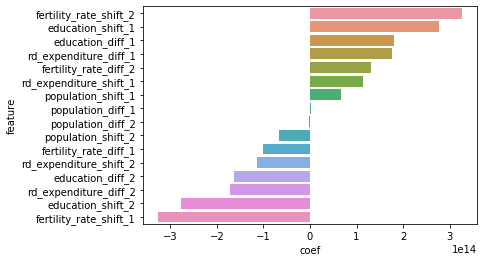

In [20]:
train_temp = train_df[all_features + ['compensation']].dropna()
test_temp = test_df[all_features + ['compensation']].dropna()
x_train, y_train = train_temp[all_features], train_temp[['compensation']]
x_test, y_test = test_temp[all_features], test_temp[['compensation']]

lr = LinearRegression()
lr.fit(x_train, y_train)

result = pd.DataFrame({
    'feature': all_features,
    'coef': lr.coef_[0]
}).sort_values(by=['coef'], ascending=False)
sns.barplot(data=result, y='feature', x='coef')

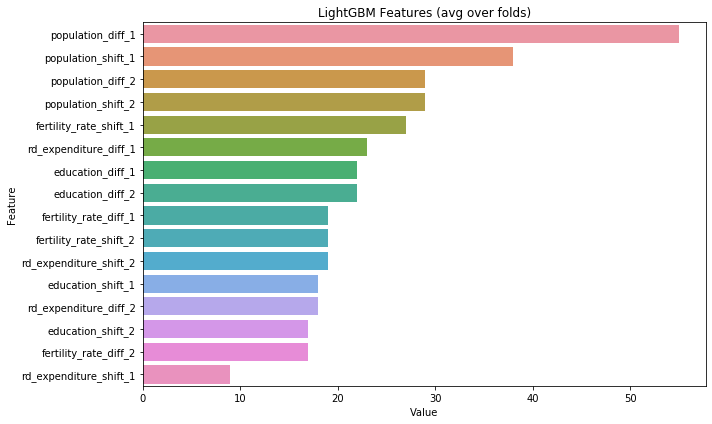

In [21]:
feature_importances = pd.DataFrame(sorted(zip(gbm.feature_importances_, all_features)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importances.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [22]:
explainer = shap.TreeExplainer(tuned_gbm)
shap_values = explainer.shap_values(x_test)

shap.force_plot(explainer.expected_value, shap_values[0,:], x_test.iloc[0,:])

/usr/local/lib/python3.7/site-packages/shap/explainers/tree.py:114: UserWarning:

Setting feature_perturbation = "tree_path_dependent" because no background data was given.



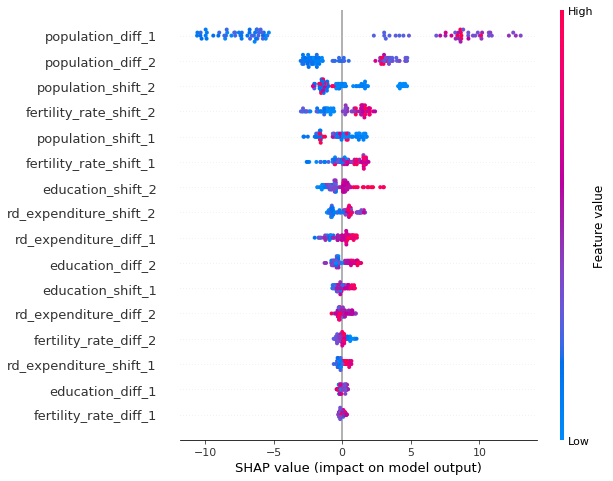

In [23]:
shap.summary_plot(shap_values, x_test)

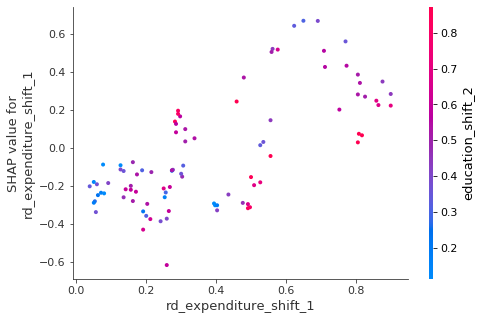

In [24]:
shap.dependence_plot('rd_expenditure_shift_1', shap_values, x_test)

## ExplainableBoostingRegressor (from InterpretML)

EBM is a generalized additive model formalized as follows.

$$
g(E[y]) = \beta_0 + \sum f_j(x_j) + \sum f_{ij}(x_i,x_j)
$$

EBM learns the best feature function $f_j$ for each feature to show how each feature contributes to the model's prediction for the problem. EBM can also automatically detect and include pairwise interaction terms.

Paper: https://arxiv.org/pdf/1909.09223.pdf

### Global Explanation

In [27]:
from sklearn.model_selection import train_test_split
import interpret
from interpret.glassbox import ExplainableBoostingRegressor

train_temp = train_df[all_features + ['compensation']].dropna()
test_temp = test_df[all_features + ['compensation']].dropna()
x_train, y_train = train_temp[all_features], train_temp[['compensation']]
x_test, y_test = test_temp[all_features], test_temp[['compensation']]

ebm = ExplainableBoostingRegressor(random_state=42)
ebm.fit(x_train, y_train)

ebm_global = ebm.explain_global(name='EBM')
interpret.show(ebm_global)

<!-- http://127.0.0.1:7075/4501180368/ -->

### Local Explanation

In [28]:
ebm_local = ebm.explain_local(x_test[:5], y_test[:5], name='EBM')
interpret.show(ebm_local)

<!-- http://127.0.0.1:7075/5218852816/ -->

In [29]:
from interpret.glassbox import LinearRegression
from interpret.perf import RegressionPerf

ebm_perf = RegressionPerf(ebm.predict).explain_perf(x_test, y_test, name='Linear Regression')
interpret.show(ebm_perf)

<!-- http://127.0.0.1:7075/5216627088/ -->